In [9]:
import matplotlib.pyplot as plt
import numpy as np
from noise_correlations import plot
%matplotlib inline

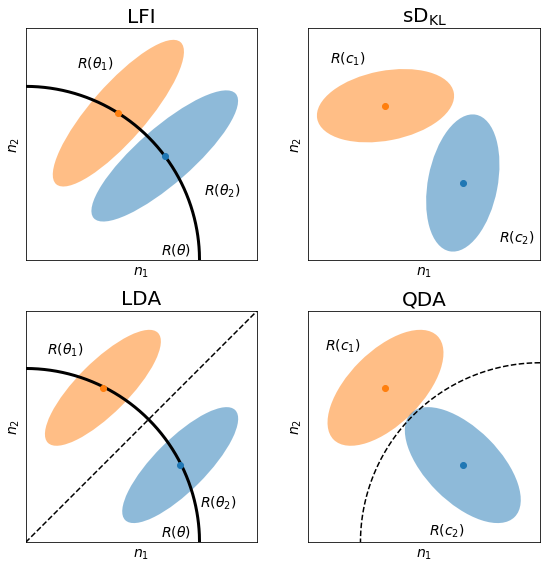

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes_label_size = 14
title_size = 20
plot_label_size = 14

# linear fisher information plot #
lfi = axes[0, 0]

# plot curve

def s(x):
    return np.sqrt(0.75**2 - x**2)

x = np.linspace(0, 0.75, 1000)
lfi.plot(x, s(x), color='k', linewidth=3)

lfi_mu0 = np.array([0.6, s(0.6)])
lfi_mu1 = np.array([0.4, s(0.4)])
lfi_cov0 = np.array([[0.32, 0.30], [0.30, 0.40]])
lfi_cov1 = np.array([[0.40, 0.30], [0.30, 0.32]])
plot.plot_ellipses(mu0=lfi_mu0, mu1=lfi_mu1, cov0=lfi_cov0, cov1=lfi_cov1, faxes=(fig, lfi))

# text
lfi.text(x=0.30, y=0.85, s=r'$R(\theta_1)$',
         fontsize=plot_label_size,
         horizontalalignment='center',
         verticalalignment='center')

lfi.text(x=0.85, y=0.30, s=r'$R(\theta_2)$',
         fontsize=plot_label_size,
         horizontalalignment='center',
         verticalalignment='center')

lfi.text(x=0.65, y=0.05, s=r'$R(\theta)$',
         fontsize=plot_label_size,
         horizontalalignment='center',
         verticalalignment='center')

# clean up plot
lfi.set_title(r'LFI', fontsize=title_size)


# symmetric KL divergence plot #
sKL = axes[0, 1]

sKL_mu0 = np.array([2./3, 1./3])
sKL_mu1 = np.array([1./3, 2./3])
sKL_cov0 = np.array([[0.35, 0.05], [0.05, 0.10]])
sKL_cov1 = np.array([[0.10, 0.05], [0.05, 0.35]])
plot.plot_ellipses(mu0=sKL_mu0, mu1=sKL_mu1, cov0=sKL_cov0, cov1=sKL_cov1, faxes=(fig, sKL))

# text
sKL.text(x=0.17, y=0.87, s=r'$R(c_1)$',
         fontsize=plot_label_size,
         horizontalalignment='center',
         verticalalignment='center')

sKL.text(x=0.90, y=0.10, s=r'$R(c_2)$',
         fontsize=plot_label_size,
         horizontalalignment='center',
         verticalalignment='center')

# clean up plot
sKL.set_title(r'$\mathregular{sD}_\mathregular{KL}$', fontsize=20)

# linear discriminant analysis plot #
lda = axes[1, 0]

x = np.linspace(0, 0.75, 1000)
lda.plot(x, s(x), color='k', linewidth=3)
# plot ellipses
lda_mu0 = np.array([2./3, 1./3])
lda_mu1 = np.array([1./3, 2./3])
lda_cov = np.array([[0.25, 0.2], [0.2, 0.25]])
plot.plot_ellipses(mu0=lda_mu0, mu1=lda_mu1, cov0=lda_cov, cov1=lda_cov, faxes=(fig, lda))

# plot discriminator
lda.plot([0, 1], [0, 1], color='k', linestyle='--')

# text
lda.text(x=0.17, y=0.83, s=r'$R(\theta_1)$',
         fontsize=plot_label_size,
         horizontalalignment='center',
         verticalalignment='center')

lda.text(x=0.83, y=0.17, s=r'$R(\theta_2)$',
         fontsize=plot_label_size,
         horizontalalignment='center',
         verticalalignment='center')

lda.text(x=0.65, y=0.05, s=r'$R(\theta)$',
         fontsize=plot_label_size,
         horizontalalignment='center',
         verticalalignment='center')

# clean up plot
lda.set_title(r'LDA', fontsize=title_size)


# quadratic discriminant analysis plot #

qda = axes[1, 1]

qda_mu0 = np.array([2./3, 1./3])
qda_mu1 = np.array([1./3, 2./3])
qda_cov0 = np.array([[0.25, -0.15], [-0.15, 0.25]])
qda_cov1 = np.array([[0.25, 0.15], [0.15, 0.25]])
plot.plot_ellipses(mu0=qda_mu0, mu1=qda_mu1, cov0=qda_cov0, cov1=qda_cov1, faxes=(fig, qda))

x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
x, y = np.meshgrid(x, y)
xy = np.vstack((x, y)).T
qda.contour(
    x, y, -((x-1)**2 + y**2),
    [-0.60], colors='k')

# text
qda.text(x=0.15, y=0.85, s=r'$R(c_1)$',
         fontsize=plot_label_size,
         horizontalalignment='center',
         verticalalignment='center')

qda.text(x=0.60, y=0.05, s=r'$R(c_2)$',
         fontsize=plot_label_size,
         horizontalalignment='center',
         verticalalignment='center')

# clean up plot

qda.set_title(r'QDA', fontsize=title_size)

for ax in [lfi, sKL, lda, qda]:
    ax.set_xlabel(r'$n_1$', fontsize=axes_label_size)
    ax.set_ylabel(r'$n_2$', fontsize=axes_label_size)
    ax.set_aspect('equal')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig('cost_setup.pdf', dpi=300)